In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#loading two data sets which are given as per requirments
data = pd.read_pickle('dataset.pkl')
data1=pd.read_pickle('dataset_unlabeled.pkl')


In [31]:
print(len(data))
print(len(data1))

15000
15822


## Data Processing Steps


In [3]:
train_data = data[:10000]
examin_data=data[10000:]
examin_data1=data1
def convertToDataFrame(data):
    
    ids = []
    
    for index in data[0]:
        ids.append(index[1])
        
    dates = []
    for date in data[1]:
        dates.append(date[1])
    
    transactions = []
    for trans in data[2]:
        temp_row=[]
        for temp in trans[1]:
            #print(temp)
            temp_row.append(temp[0])
        transactions.append(temp_row)
    #print(transactions)
    
    days=[]
    for day_before in data[3]:
        temp_row=[]
        for temp in day_before[1]:
            temp_row.append(temp[0])
        days.append(temp_row)
    
    loan_amounts=[]
    for loan_amount in data[4]:
        loan_amounts.append(loan_amount[1])
        
    loan_dates=[]
    for loan_date in data[5]:
        loan_dates.append(loan_date[1])
        
    isDefaults=[]
   
    for isDefault in data[6]:
        if(len(isDefault)==0):
            isDefaults.append(-1)
        else:
            isDefaults.append(isDefault[1])
    
    d = {'date': dates, 'transaction': transactions,'days_before':days,
         'loan_amount':loan_amounts,'loan_date':loan_dates,'isDefault': isDefaults,
        'customer_id':ids
        }
    df = pd.DataFrame(data=d)
    return df

train_data=convertToDataFrame(train_data)
examin_data=convertToDataFrame(examin_data)
examin_data1=convertToDataFrame(examin_data1)
examin_data.head(5)


,date,transaction,days_before,loan_amount,loan_date,isDefault,customer_id
0,"[2017-08-15, 2017-08-15, 2017-08-15, 2017-08-1...","[-500.0, 2860.17, -475.0, -100.0, -310.0, -879...","[69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 68.0, 68....",500,2017-10-29,-1,A9C3F4CA-66BF-44EE-8C38-1C50D0751CD1-500
1,"[2017-10-20, 2017-10-20, 2017-10-20, 2017-10-2...","[-57.91, -265.0, -125.0, 1263.41, -15.25, -218...","[79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79....",500,2018-01-16,-1,A9C93D6B-8625-48EE-9E05-EB63256DEEA6-500
2,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[-30.2, -0.5, -10.49, -63.0, -11.82, -53.52, -...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",750,2016-11-25,-1,A9D12F62-35D5-44DE-8446-B8C2E4A5E938-750
3,"[2017-04-10, 2017-04-10, 2017-04-10, 2017-04-1...","[-43.73, -73.27, -155.66, -250.0, -25.99, -94....","[87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 86.0, 86....",600,2017-07-07,-1,A9D3EC9F-B3EB-4A56-8BC6-4614A1C42FE2-600
4,"[2016-07-25, 2016-07-25, 2016-07-25, 2016-07-2...","[-0.98, -20.0, -9.02, 36.0, 40.0, -9.1, -3.55,...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",700,2016-10-21,-1,A9D54EF9-3CBA-4481-80B2-59FD92BB60D9-700


**Cacluate Same Day**

In [4]:
from datetime import datetime,timedelta


def mergeByCustormer(dataframe):
    dates_=[]
    income_=[]
    outcome_=[]
    days_=[]
    delta_=[]
    
    for i in range(0,len(dataframe)):
        byDate={}
        data = dataframe.iloc[i]
        date=data['date']
        trans=data['transaction']
        days=data['days_before']
        for _date,_trans,_days in zip(date,trans,days):
            if(_date in byDate.keys()):
                if(_trans>0):
                    byDate[_date][0]=byDate[_date][0]+_trans
                else:
                    byDate[_date][1]=byDate[_date][1]+_trans
            else:
                _income=0
                _outcome=0
                if(_trans>0):
                    _income=_trans
                else:
                    _outcome=_trans
                byDate[_date]=[_income,_outcome,_days]
        _dateCus=[]
        _incomeCus=[]
        _outcomeCus=[]
        _daysCus=[]
        _delta=[]
        for _date in byDate.keys():
            _dateCus.append(_date)
            
            _incomeCus.append(byDate[_date][0])
            _outcomeCus.append(byDate[_date][1])
            _daysCus.append(byDate[_date][2])
            
            _date1=datetime.strptime(_date,"%Y-%m-%d").date()
            _date2=datetime.strptime(data['loan_date'],"%Y-%m-%d").date()
            _timedelta=_date2-_date1
            #print(_timedelta.days)
            _delta.append(_timedelta.days)
        #print(_dateCus)
        #print(_incomeCus)
        #print(_outcomeCus)
        #print(_daysCus)
        #print(len(dates_))
        dates_.append(_dateCus)        
        income_.append(_incomeCus)
        outcome_.append(_outcomeCus)
        days_.append(_daysCus)
        delta_.append(_delta)
        
    
    dataframe['dates'] = dates_
    dataframe['income'] = income_
    dataframe['outcome'] = outcome_
    dataframe['days'] = days_
    dataframe['delta'] = delta_
            
mergeByCustormer(train_data)        
mergeByCustormer(examin_data) 
mergeByCustormer(examin_data1)
train_data.head(10)

,date,transaction,days_before,loan_amount,loan_date,isDefault,customer_id,dates,income,outcome,days,delta
0,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[-60.0, 0.02, 0.01, 60.0, -60.0, 60.0, -74.3, ...","[79.0, 79.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76....",750,2017-08-16,1,00076211-9BBD-4E06-82C2-E9FB7B102964-750,"[2017-05-19, 2017-05-29, 2017-05-31, 2017-06-0...","[0, 0.02, 0.01, 60.0, 0, 60.0, 0, 0, 60.0, 0, ...","[-60.0, 0, 0, 0, -60.0, 0, -134.3, -682.459999...","[79.0, 79.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76....","[89, 79, 77, 76, 75, 62, 61, 58, 57, 56, 51, 5..."
1,"[2017-11-20, 2017-11-20, 2017-11-20, 2017-11-2...","[-68.93, -23.7, -0.5, -63.9, -1.57, -41.08, 0....","[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12....",500,2018-02-17,1,0009107F-8F57-441C-A590-5773992261A9-500,"[2017-11-20, 2017-11-21, 2017-11-22, 2017-11-2...","[200.5, 4.0, 31.5, 1.0, 810.49, 0, 971.0, 2.5,...","[-238.02, -70.89, -22.4, -1.0, -108.5, -84.52,...","[12.0, 12.0, 11.0, 11.0, 11.0, 8.0, 8.0, 8.0, ...","[89, 88, 87, 86, 85, 82, 81, 80, 79, 78, 75, 7..."
2,"[2017-05-29, 2017-05-29, 2017-05-29, 2017-05-2...","[-23.5, -9.78, -14.25, -75.01, -20.0, -68.5, -...","[87.0, 87.0, 87.0, 87.0, 86.0, 86.0, 83.0, 83....",1000,2017-08-25,0,000B47CB-514F-446C-B7BE-2F2D304E2F4D-1000,"[2017-05-29, 2017-05-31, 2017-06-02, 2017-06-0...","[250.0, 0, 2045.08, 0, 0, 0, 20.0, 0, 0, 1587....","[-246.03000000000003, -31.23, -1347.37, -447.5...","[87.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79.0, 79....","[88, 86, 84, 81, 80, 78, 77, 72, 71, 70, 67, 6..."
3,"[2017-08-17, 2017-08-17, 2017-08-17, 2017-08-1...","[-360.0, 105.82, 192.79, -62.25, -40.0, 164.0,...","[88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88....",250,2017-11-12,0,000CAC25-AFBD-455D-9367-D23FB38D17B0-250,"[2017-08-17, 2017-08-18, 2017-08-21, 2017-08-2...","[462.61, 0, 25.0, 80.0, 50.0, 0, 27.25, 863.62...","[-466.86, -3.77, -25.0, -13.78, -59.67, -44.19...","[88.0, 88.0, 88.0, 87.0, 87.0, 83.0, 80.0, 80....","[87, 86, 83, 79, 76, 75, 74, 73, 72, 68, 65, 6..."
4,"[2016-08-29, 2016-08-29, 2016-08-29, 2016-08-2...","[-2.16, -4.96, -17.49, -10.0, -1.5, -195.69, 3...","[88.0, 88.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87....",500,2016-11-25,0,000E9C38-708E-40F7-8ABC-9DF55B77BB54-500,"[2016-08-29, 2016-08-31, 2016-09-02, 2016-09-0...","[0, 234.59, 382.13, 0, 0, 0, 0, 0, 806.39, 0, ...","[-34.61, -302.47999999999996, -45.96, -152.519...","[88.0, 87.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79....","[88, 86, 84, 80, 79, 78, 77, 74, 70, 67, 66, 5..."
5,"[2017-08-31, 2017-09-01, 2017-09-01, 2017-09-0...","[-5.0, -3.55, -100.0, -10.0, -10.19, -9.99, -5...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, ...",300,2017-11-27,1,001F0057-C22F-40C4-8BE4-F73D58349E92-300,"[2017-08-31, 2017-09-01, 2017-09-02, 2017-09-0...","[0, 1304.91, 0, 160.0, 10.0, 1574.09, 0, 159.3...","[-5.0, -1287.85, -48.0, -152.0, -14.15, -1347....","[8.0, 8.0, 7.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, ...","[88, 87, 86, 79, 77, 73, 72, 70, 69, 68, 67, 6..."
6,"[2017-03-16, 2017-03-16, 2017-03-16, 2017-03-1...","[-8.5, -120.0, -10.0, -6.27, -40.02, -48.05, 5...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",500,2017-06-13,0,001F86A5-05B6-4F38-AA72-266850952B11-500,"[2017-03-16, 2017-03-17, 2017-03-20, 2017-03-2...","[0, 0, 50.0, 0, 863.66, 0, 0, 0, 0, 0, 0, 2071...","[-138.5, -94.34, -903.14, -436.92, -162.7, -10...","[1.0, 1.0, 1.0, 89.0, 89.0, 88.0, 88.0, 88.0, ...","[89, 88, 85, 84, 83, 82, 81, 78, 77, 76, 75, 7..."
7,"[2017-09-25, 2017-09-25, 2017-09-25, 2017-09-2...","[-3.93, -10.0, 12.41, -11.7, -15.5, -19.9, -12...","[14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",500,2017-12-21,0,002A05DA-7A82-479A-B5B7-7459942FF1D9-500,"[2017-09-25, 2017-09-26, 2017-09-27, 2017-10-0...","[12.41, 100.0, 190.0, 1742.63, 0, 0, 1441.8, 0...","[-86.65, -61.76, -140.0, -1524.4800000000002, ...","[14.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11....","[87, 86, 85, 80, 79, 78, 77, 76, 72, 71, 70, 6..."
8,"[2017-05-23, 2017-05-23, 2017-05-23, 2017-05-2...","[-10.76, -20.0, -280.0, -50.0

**Get Max Loan Value and Convert "isDefault" to 1~20 value**

## RFM
Customer profitability is measured by Recency, Frequency, and Monetary (RFM) model.
- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase
- Monetary Value: How much money a customer spends on purchases

__How Calclulate RFM Value:__
- calculate Recency = number of days since last purchase
- calculate Freqency = number of purchases during the studied period (usually one year)
- calculate Monetary = total amount of purchases made during the studied period

Calculated RMF value in incoming and outcoming seperately

We used the RFM because we can know the profiablity of the Customer whcih would help us to understand there Economical status.


In [5]:
def RFMValue(dataframe):    
    data_in_R=[]
    data_in_F=[]
    data_in_M=[]
    
    data_out_R=[]
    data_out_F=[]
    data_out_M=[]
    for i in range(0,len(dataframe)):
        data = dataframe.iloc[i]
        date=data['dates']
        income=data['income']
        outcome=data['outcome']
        delta=data['delta']
        deltaincome=[]
        deltaoutcome=[]

        for _date, _income,_outcome, _delta in zip(date, income, outcome,delta):
            #print(_date, _trans,_days)
            if(_income is not 0):
                #print(_date)
                deltaincome.append(_delta)
                income.append(_income)
                
            if(_outcome is not 0):
                #print(_days)
                deltaoutcome.append(_delta)
                outcome.append(_outcome)

        if(len(deltaoutcome)>0):
            outcome_R=min(deltaoutcome)
            #print(outcome_R)
            outcome_F=len(deltaoutcome)
            #print(outcome_F)
            outcome_M=sum(outcome)
            #print(outcome_M)
        else:
            outcome_R=0
            outcome_F=0
            outcome_M=0

        if(len(deltaincome)>0):
            income_R=min(deltaincome)
            #print(income_R)
            income_F=len(deltaincome)
            #print(income_F)
            income_M=sum(income)
            #print(income_M)
        else:
            income_R=0
            income_F=0
            income_M=0

        data_in_R.append(income_R)
        data_in_F.append(income_F)
        data_in_M.append(income_M)
        data_out_R.append(outcome_R)
        data_out_F.append(outcome_F)
        data_out_M.append(outcome_M)
    
    dataframe['in_R']=data_in_R
    dataframe['in_F']=data_in_F
    dataframe['in_M']=data_in_M
    dataframe['out_R']=data_out_R
    dataframe['out_F']=data_out_F
    dataframe['out_M']=data_out_M


RFMValue(train_data)
train_feature_data=train_data.drop(['date','transaction','days_before','loan_date','isDefault'
                                    ,'customer_id','dates','income','outcome','days','delta']
                                   ,axis=1)
train_labels_data=train_data['isDefault']

train_data_np=train_feature_data.to_numpy()
train_labels_np = train_labels_data.to_numpy()
train_feature_data.head(10)



,loan_amount,in_R,in_F,in_M,out_R,out_F,out_M
0,750,5,22,25523.20,1,37,-26946.16
1,500,1,55,35633.98,1,62,-33810.02
2,1000,7,12,25796.40,1,48,-25063.14
3,250,3,31,19403.02,2,51,-18737.94
4,500,7,11,9767.14,1,45,-10338.26
5,300,2,47,33786.72,2,52,-31907.16
6,500,5,23,51199.44,1,54,-54683.54
7,500,3,28,38570.84,1,56,-38813.66
8,500,1,48,29159.28,1,49,-30086.02
9,750,3,20,22577.32,3,45,-23500.62


## Train Classifier

In [6]:
import random


train_data_nn=train_data_np[:7001]
train_data_nn=train_data_nn.astype('float32')
train_label_nn=train_labels_np[:7001]

test_data_nn=train_data_np[7001:]
test_data_nn=test_data_nn.astype('float32')
test_label_nn=train_labels_np[7001:]


train_label_nn


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
from sklearn import preprocessing
from sklearn import tree
lb = preprocessing.LabelBinarizer()
dummY=lb.fit_transform(train_label_nn)
print(dummY)

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

knn = KNeighborsClassifier()
knn.fit(train_data_nn,dummY)

rfor = RandomForestClassifier()
rfor.fit(train_data_nn,dummY)
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(train_data_nn, dummY)

#xgb_clf = XGBClassifier()
#xgb_clf.fit(train_data_nn, dummY)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
p=knn.score(test_data_nn,test_label_nn)
print(p)

p=rfor.score(test_data_nn,test_label_nn)
print(p)

p=gb_clf.score(test_data_nn,test_label_nn)
print(p)

#p=xgb_clf.score(test_data_nn,test_label_nn)
#print(p)



0.6692230743581193
0.737245748582861
0.7635878626208736


**Draw Roc**

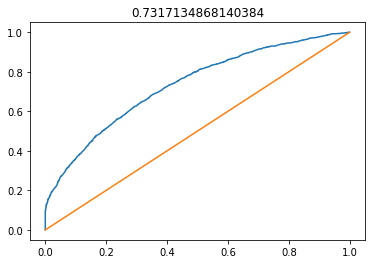

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
preds = gb_clf.predict_proba(train_data_nn)
fpr,tpr,thresholds = roc_curve(dummY,preds[:,1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title(roc_auc)
plt.show()


## Prediction

In [12]:
RFMValue(examin_data)
examin_feature_data=examin_data.drop(['date','transaction','days_before',
                                      'loan_date','isDefault','customer_id',
                                     'dates','income','outcome','days','delta']
                                   ,axis=1)


examin_feature_data.head()
RFMValue(examin_data1)
examin_feature_data1=examin_data1.drop(['date','transaction','days_before',
                                      'loan_date','isDefault','customer_id',
                                     'dates','income','outcome','days','delta']
                                   ,axis=1)


examin_feature_data1.head()

,loan_amount,in_R,in_F,in_M,out_R,out_F,out_M
0,600,76,5,4740.14,76,8,-5336.14
1,500,4,17,10065.46,3,37,-9905.64
2,500,5,19,33086.56,3,49,-32421.76
3,750,2,40,32868.14,2,52,-32961.86
4,500,3,7,3093.18,3,9,-3030.76


In [13]:
examin_data_np=examin_feature_data.to_numpy()
examin_data_np=examin_data_np.astype('float32')

examin_label=gb_clf.predict_proba(examin_data_np)
print(examin_label)

defaults=[]
count=0
for examin in examin_label:    
    if(examin[1]>=0.5):
        count=count+1
    defaults.append(examin[1])
print(count*100/5000)
predict_result = pd.DataFrame(data=defaults,columns=['isDefault'],index=examin_data['customer_id'])
predict_result.head(10)
#predict_result.to_csv (r'result.csv') 

[[0.60688057 0.39311943]
 [0.57923265 0.42076735]
 [0.87775998 0.12224002]
 ...
 [0.03731671 0.96268329]
 [0.63419683 0.36580317]
 [0.76594854 0.23405146]]
4.76


,isDefault
customer_id,
A9C3F4CA-66BF-44EE-8C38-1C50D0751CD1-500,0.393119
A9C93D6B-8625-48EE-9E05-EB63256DEEA6-500,0.420767
A9D12F62-35D5-44DE-8446-B8C2E4A5E938-750,0.122240
A9D3EC9F-B3EB-4A56-8BC6-4614A1C42FE2-600,0.263378
A9D54EF9-3CBA-4481-80B2-59FD92BB60D9-700,0.207016
A9D8D5D1-C59F-4C78-AF37-1DA4A9D4D1FC-750,0.879648
A9D9A46A-D825-4F84-9E21-8F09352E93AF-600,0.229490
A9DDD331-06FB-41D9-ADDD-318E2530ECD8-750,0.142736
A9E034FA-C91A-45F9-B69E-F765A67E3C2E-750,0.143452


In [14]:
examin_data_np_1=examin_feature_data1.to_numpy()
examin_data_np_1=examin_data_np_1.astype('float32')

examin_label_1=gb_clf.predict_proba(examin_data_np_1)
print(examin_label_1)

defaults=[]
count=0
for examin in examin_label_1:    
    if(examin[1]>=0.5):
        count=count+1
    defaults.append(examin[1])
print(count*100/5000)
predict_result_1 = pd.DataFrame(data=defaults,columns=['isDefault'],index=examin_data1['customer_id'])
predict_result_1.head(10)
#predict_result.to_csv (r'result1.csv') 

[[0.03232219 0.96767781]
 [0.67202131 0.32797869]
 [0.73486644 0.26513356]
 ...
 [0.667355   0.332645  ]
 [0.55022501 0.44977499]
 [0.88712493 0.11287507]]
71.86


,isDefault
customer_id,
00068510-30E0-43F0-B29D-F4FE4FDF3C0D-600,0.967678
0007E11E-3681-4E5E-A475-475D6D1B7D75-500,0.327979
000DF011-4E97-40BD-8B97-DC62024EBAC2-500,0.265134
000E7E43-712F-4B8E-B387-EE3E69BBD70D-750,0.155642
0014B4A2-AE01-4BE8-9CFC-C054298C4CA8-500,0.320894
001621DA-3AA8-424E-B588-02703F657A5F-500,0.366058
00175C96-49C5-4028-8097-09ABA624FE3A-500,0.977966
001C0E9D-A9BD-4E97-A0B5-11995BC490CA-750,0.132057
00251568-B9C0-4599-B8BD-844A3ECA22CC-500,0.228499


In [15]:
result = pd.concat([predict_result,predict_result_1])  
result.to_csv (r'result.csv') 

## Select Diffrent features

**Select Out RFM**

In [16]:
train_feature_data1=train_feature_data.drop(['in_R','in_F','in_M'],axis=1)
train_data_np1=train_feature_data1.to_numpy()

train_feature_data1.head(10)


,loan_amount,out_R,out_F,out_M
0,750,1,37,-26946.16
1,500,1,62,-33810.02
2,1000,1,48,-25063.14
3,250,2,51,-18737.94
4,500,1,45,-10338.26
5,300,2,52,-31907.16
6,500,1,54,-54683.54
7,500,1,56,-38813.66
8,500,1,49,-30086.02
9,750,3,45,-23500.62


In [17]:
train_data_nn1=train_data_np1[:7001]
train_data_nn1=train_data_nn1.astype('float32')
print(train_data_nn1)
test_data_nn1=train_data_np1[7001:]
test_data_nn1=test_data_nn1.astype('float32')
print(test_data_nn1)

[[ 7.500000e+02  1.000000e+00  3.700000e+01 -2.694616e+04]
 [ 5.000000e+02  1.000000e+00  6.200000e+01 -3.381002e+04]
 [ 1.000000e+03  1.000000e+00  4.800000e+01 -2.506314e+04]
 ...
 [ 5.000000e+02  1.000000e+00  3.300000e+01 -2.093324e+04]
 [ 5.000000e+02  1.000000e+00  3.200000e+01 -3.662450e+04]
 [ 1.000000e+03  1.000000e+00  3.100000e+01 -9.908940e+03]]
[[ 5.000000e+02  1.000000e+00  3.100000e+01 -9.801280e+03]
 [ 2.500000e+02  1.000000e+00  5.100000e+01 -2.310924e+04]
 [ 5.000000e+02  2.000000e+00  2.200000e+01 -8.631900e+03]
 ...
 [ 5.000000e+02  4.000000e+00  3.800000e+01 -1.747294e+04]
 [ 7.500000e+02  1.000000e+00  5.500000e+01 -4.457150e+04]
 [ 6.000000e+02  3.000000e+00  5.700000e+01 -2.152786e+04]]


In [18]:
gb_clf1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf1.fit(train_data_nn1, dummY)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
p=gb_clf1.score(test_data_nn1,test_label_nn)
print(p)



0.7579193064354784


In [20]:
examin_feature_data1=examin_feature_data.drop(['in_R','in_F','in_M'],axis=1)
examin_feature_data1.head(10)

,loan_amount,out_R,out_F,out_M
0,500,2,35,-38265.04
1,500,1,32,-27248.90
2,750,1,58,-19114.62
3,600,1,55,-35471.00
4,700,1,61,-18623.70
5,750,6,43,-12702.04
6,600,1,60,-50067.58
7,750,1,56,-22010.02
8,750,1,47,-20662.84
9,500,1,75,-33152.60


**Select income**

In [21]:
train_feature_data2=train_feature_data.drop(['out_R','out_F','out_M'],axis=1)
train_data_np2=train_feature_data2.to_numpy()

train_feature_data2.head(10)

,loan_amount,in_R,in_F,in_M
0,750,5,22,25523.20
1,500,1,55,35633.98
2,1000,7,12,25796.40
3,250,3,31,19403.02
4,500,7,11,9767.14
5,300,2,47,33786.72
6,500,5,23,51199.44
7,500,3,28,38570.84
8,500,1,48,29159.28
9,750,3,20,22577.32


In [22]:
train_data_nn2=train_data_np2[:7001]
train_data_nn2=train_data_nn2.astype('float32')

test_data_nn2=train_data_np2[7001:]
test_data_nn2=test_data_nn2.astype('float32')


In [23]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train_data_nn2, dummY)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
p=gb_clf2.score(test_data_nn2,test_label_nn)
print(p)



0.7482494164721574


In [25]:
examin_feature_data2=examin_feature_data.drop(['out_R','out_F','out_M'],axis=1)

examin_feature_data2.head(10)

,loan_amount,in_R,in_F,in_M
0,500,4,13,38603.98
1,500,1,15,26714.84
2,750,2,26,18076.12
3,600,7,15,32025.44
4,700,1,19,20979.12
5,750,6,23,12456.20
6,600,1,57,49971.78
7,750,1,52,21740.06
8,750,1,24,20148.26
9,500,1,31,32844.64


In [29]:
#examin_data_np2=examin_feature_data2.to_numpy()
#examin_data_np2=examin_data_np2.astype('float32')
